# Insurance Claims- Fraud Detection

# Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims.

# Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

# This is a classification problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('insurance_fraud.csv')

In [3]:
data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [4]:
pd.set_option('display.max_rows',None)

In [5]:
df=pd.DataFrame(data)

In [6]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
5                   256   39         104594       12-10-2006           OH   
6                   137   34         413978       04-06-2000           IN   
7                   165   37         429027       03-02-1990           IL   
8                    27   33         485665       05-02-1997           IL   
9                   212   42         636550       25-07-2011           IL   
10                  235   42         543610       26-05-2002           OH   
11                  447   61         214618       29-05-1999           OH   
12                   60   23         842643       20-11-1997           OH   
13                  121   34         626808       26-10-2012           OH   
14                  180   38         644081       28-12-1998           OH   
15                  473   58         892874       19-10-1992           IN   
16                   70   26         558938       08-06-2005           OH   
17                  140   31         275265       15-11-2004           IN   
18                  160   37         921202       28-12-2014           OH   
19                  196   39         143972       02-08-1992           IN   
20                  460   62         183430       25-06-2002           IN   
21                  217   41         431876       27-11-2005           IL   
22                  370   55         285496       27-05-1994           IL   
23                  413   55         115399       08-02-1991           IN   
24                  237   40         736882       02-02-1996           IN   
25                    8   35         699044       05-12-2013           OH   
26                  257   43         863236       20-09-1990           IN   
27                  202   34         608513       18-07-2002           IN   
28                  224   40         914088       08-02-1990           OH   
29                  241   45         596785       04-03-2014           IL   
30                   64   25         908616       18-02-2000           IL   
31                  166   37         666333       19-06-2008           IL   
32                  155   35         336614       01-08-2003           IL   
33                  114   30         584859       04-04-1992           IL   
34                  149   37         990493       13-01-1991           IL   
35                  147   33         129872       08-08-2010           OH   
36                   62   28         200152       09-03-2003           IL   
37                  289   49         933293       03-02-1993           IL   
38                  431   54         485664       25-11-2002           IN   
39                  199   37         982871       27-07-1997           IN   
40                   79   26         206213       08-05-1995           IL   
41                  116   34         616337       30-08-2012           IN   
42                   37   23         448961       30-04-2006           IL   
43                  106   30         790442       13-04-2003           OH   
44                  269   44         108844       05-12-2007           IL   
45                  265   40         430029       21-08-2006           IL   
46                  163   33         529112       08-01-1990           IN   
47                  355   47         939631       18-03-1990           OH   
48                  175   34         866931       07-01-2008           IN   
49                  192   35         582011       10-03-1997           IL   
50                  430   59         691189       10-01-2004           OH   
5

In [8]:
df.shape

(1000, 40)

There are in total 1000 records and 40 features.

The target(output) feature is fraud reported.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

The datatype of the features are mixed i.e object,integer,float.

In [12]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

All the records in feature _c39 are having Nan values so i will be dropping that feature from the dataset.

In [14]:
df.drop('_c39',axis=1,inplace=True)

In [15]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
5                   256   39         104594       12-10-2006           OH   
6                   137   34         413978       04-06-2000           IN   
7                   165   37         429027       03-02-1990           IL   
8                    27   33         485665       05-02-1997           IL   
9                   212   42         636550       25-07-2011           IL   
10                  235   42         543610       26-05-2002           OH   
11                  447   61         214618       29-05-1999           OH   
12                   60   23         842643       20-11-1997           OH   
13                  121   34         626808       26-10-2012           OH   
14                  180   38         644081       28-12-1998           OH   
15                  473   58         892874       19-10-1992           IN   
16                   70   26         558938       08-06-2005           OH   
17                  140   31         275265       15-11-2004           IN   
18                  160   37         921202       28-12-2014           OH   
19                  196   39         143972       02-08-1992           IN   
20                  460   62         183430       25-06-2002           IN   
21                  217   41         431876       27-11-2005           IL   
22                  370   55         285496       27-05-1994           IL   
23                  413   55         115399       08-02-1991           IN   
24                  237   40         736882       02-02-1996           IN   
25                    8   35         699044       05-12-2013           OH   
26                  257   43         863236       20-09-1990           IN   
27                  202   34         608513       18-07-2002           IN   
28                  224   40         914088       08-02-1990           OH   
29                  241   45         596785       04-03-2014           IL   
30                   64   25         908616       18-02-2000           IL   
31                  166   37         666333       19-06-2008           IL   
32                  155   35         336614       01-08-2003           IL   
33                  114   30         584859       04-04-1992           IL   
34                  149   37         990493       13-01-1991           IL   
35                  147   33         129872       08-08-2010           OH   
36                   62   28         200152       09-03-2003           IL   
37                  289   49         933293       03-02-1993           IL   
38                  431   54         485664       25-11-2002           IN   
39                  199   37         982871       27-07-1997           IN   
40                   79   26         206213       08-05-1995           IL   
41                  116   34         616337       30-08-2012           IN   
42                   37   23         448961       30-04-2006           IL   
43                  106   30         790442       13-04-2003           OH   
44                  269   44         108844       05-12-2007           IL   
45                  265   40         430029       21-08-2006           IL   
46                  163   33         529112       08-01-1990           IN   
47                  355   47         939631       18-03-1990           OH   
48                  175   34         866931       07-01-2008           IN   
49                  192   35         582011       10-03-1997           IL   
50                  430   59         691189       10-01-2004           OH   
5

In [16]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

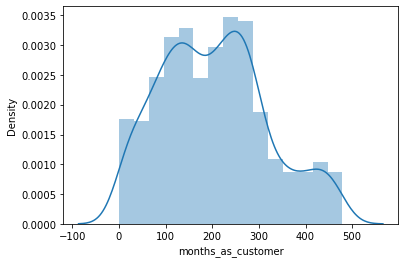

In [18]:
sns.distplot(df['months_as_customer'])

The data of months as customer feature is not evenly distributed. Further, most of data lies in the range of 100 to 150 and 200 to 300 months as customer.

<AxesSubplot:xlabel='age', ylabel='Density'>

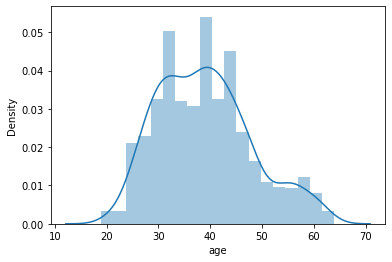

In [20]:
sns.distplot(df['age'])

The data of age is not evenly distributed. Further, most of data pertaining to age lies in the range of 30 to 35 and 40 to 48. 

<AxesSubplot:xlabel='policy_state', ylabel='count'>

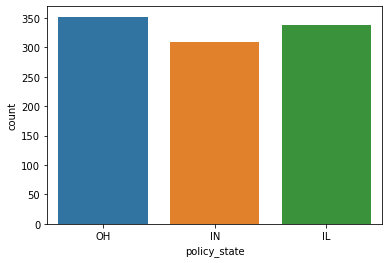

In [25]:
sns.countplot(df['policy_state'])

In [26]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

The records pertaining to OH state i.e 352 is highest followed by IL and IN.

In [27]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

There are 753 records(75%) were fraud has not been reported and 247 cases 25% where fraud has been reported.

In [28]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

The maximum cases are reported from NY i.e 262 records followed and SC and WV.

The lowest cases are reported from OH i.e only 23.

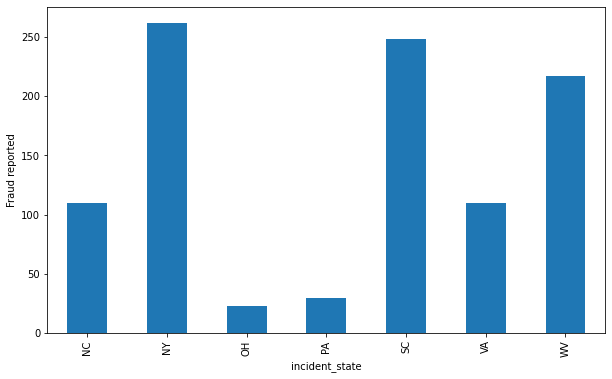

In [32]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state')['fraud_reported'].count().plot.bar()
ax.set_ylabel('Fraud reported')
plt.show()

Most of the cases are reported from NY.

In [33]:
df.groupby('incident_state')['fraud_reported'].value_counts()

incident_state  fraud_reported
NC              N                  76
                Y                  34
NY              N                 204
                Y                  58
OH              N                  13
                Y                  10
PA              N                  22
                Y                   8
SC              N                 175
                Y                  73
VA              N                  85
                Y                  25
WV              N                 178
                Y                  39
Name: fraud_reported, dtype: int64

Most of the fraud reported cases where fraud is done is reported from incident_state SC followed by NY,WV.

The lowest cases of fraud reported where fraud is not done is from incident_state PA.

In [34]:
pd.crosstab(df['age'],df['fraud_reported'],margins=True)

fraud_reported    N    Y   All
age                           
19                0    1     1
20                1    0     1
21                6    0     6
22                0    1     1
23                3    4     7
24                8    2    10
25               10    4    14
26               18    8    26
27               21    3    24
28               23    7    30
29               25   10    35
30               36    6    42
31               28   14    42
32               27   11    38
33               27   12    39
34               31   13    44
35               27    5    32
36               28    4    32
37               31   10    41
38               31   11    42
39               38   10    48
40               34    4    38
41               29   16    45
42               23    9    32
43               38   11    49
44               24    8    32
45               21    5    26
46               26    7    33
47               17    7    24
48               19    6    25
49               14    0    14
50               10    3    13
51                5    4     9
52                2    2     4
53               12    1    13
54                7    3    10
55               10    4    14
56                5    3     8
57               12    4    16
58                4    4     8
59                4    1     5
60                5    4     9
61                7    3    10
62                3    1     4
63                1    1     2
64                2    0     2
All             753  247  1000

<AxesSubplot:xlabel='age'>

<Figure size 1080x576 with 0 Axes>

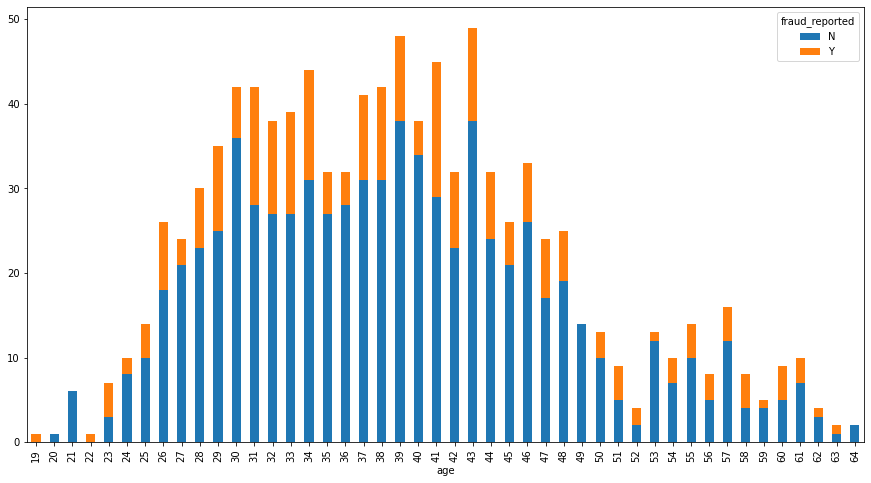

In [39]:
plt.figure(figsize= [15, 8])
table=pd.crosstab(df.age, df.fraud_reported)
table.plot(kind='bar',stacked=True)
plt.xlabel('Age')
plt.ylabel('Fraud reported')

From above plot, it is obvious that, age is an important predictor for fraud reported.Age between 19 to 23 shows substantial amount of fraud.


Text(0, 0.5, 'Fraud Reported')

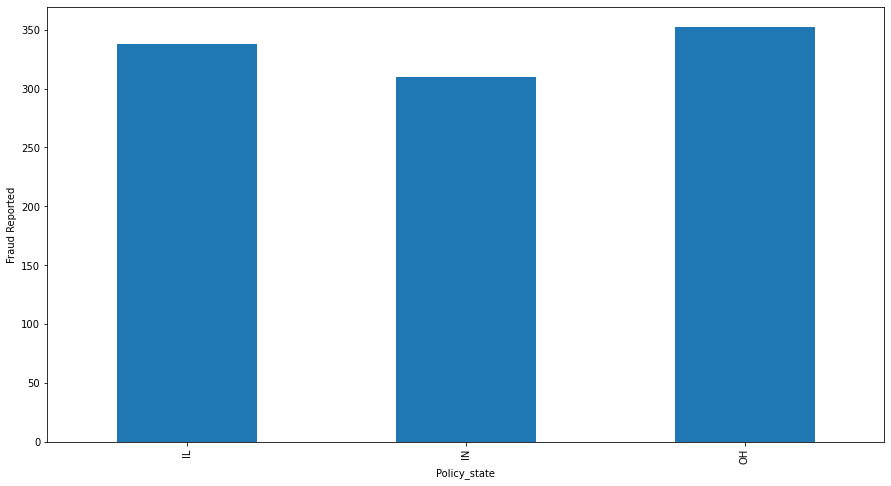

In [44]:
df.groupby('policy_state')['fraud_reported'].count().plot.bar()
plt.xlabel('Policy_state')
plt.ylabel('Fraud Reported')

In [49]:
table1=pd.crosstab(df['policy_state'],df['fraud_reported'])

In [51]:
pd.crosstab(df['policy_state'],df['fraud_reported'],margins=True)

fraud_reported    N    Y   All
policy_state                  
IL              261   77   338
IN              231   79   310
OH              261   91   352
All             753  247  1000

The OH policy_state is having highest no of fradulent cases reported i.e 352 and out of which it is having highest cases i.e 91 were fraud is reported.

<AxesSubplot:xlabel='policy_state'>

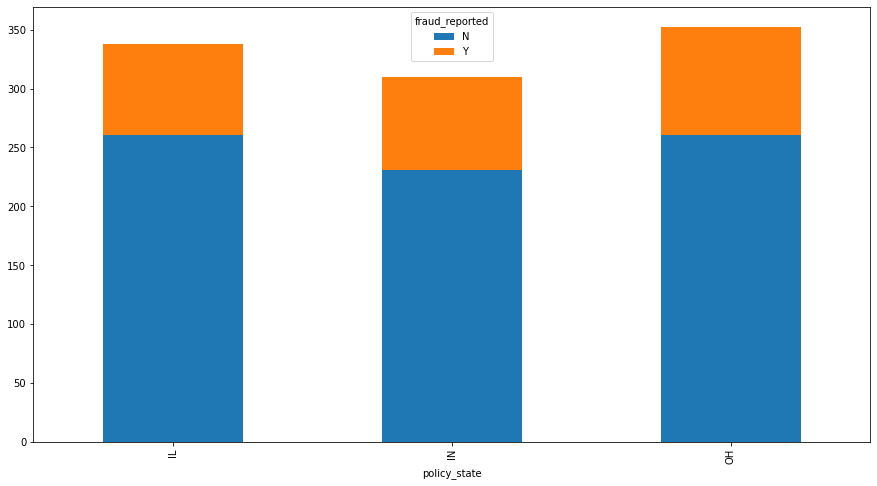

In [50]:
table1.plot(kind='bar',stacked=True)

Text(0, 0.5, 'total_claim_amount')

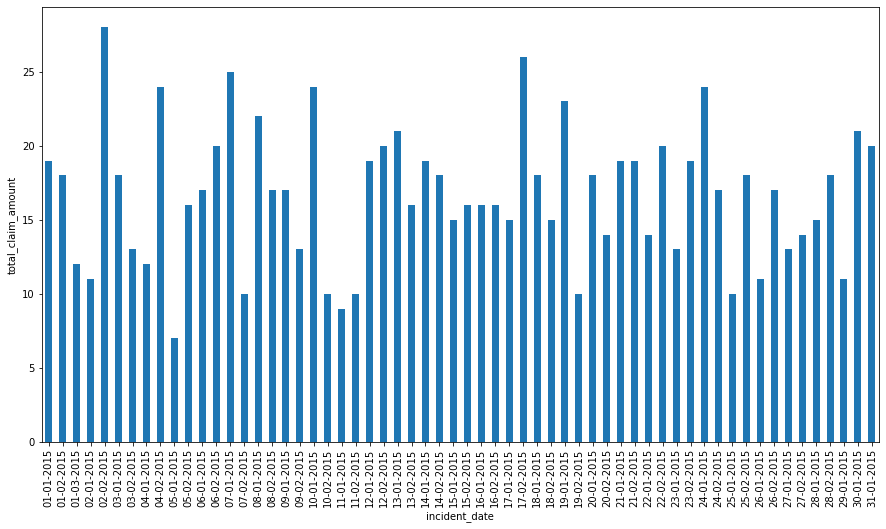

In [59]:
df.groupby('incident_date')['total_claim_amount'].count().plot.bar()
plt.xlabel('incident_date')
plt.ylabel('total_claim_amount')

We see that, all the cases in above plot are for the months of January and February 2015.

Text(0, 0.5, 'fraud_reported')

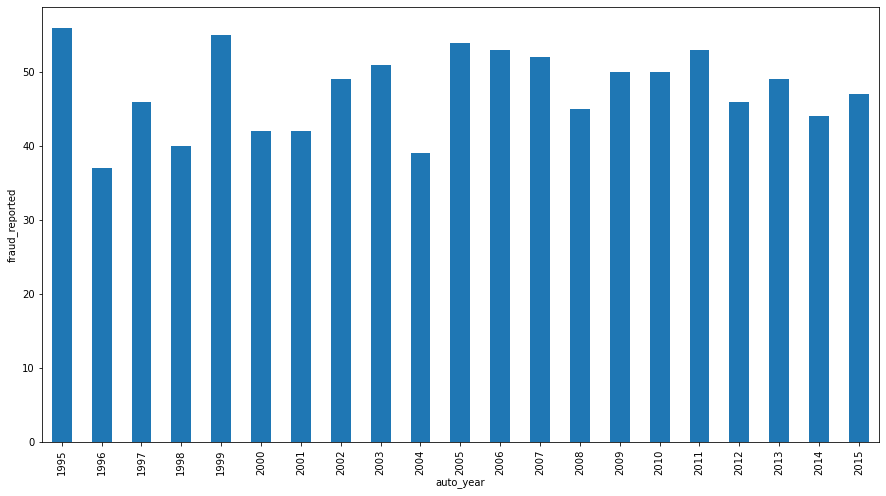

In [60]:
df.groupby('auto_year')['fraud_reported'].count().plot.bar()
plt.xlabel('auto_year')
plt.ylabel('fraud_reported')

In [61]:
pd.crosstab(df['auto_year'],df['fraud_reported'],margins=True)

fraud_reported    N    Y   All
auto_year                     
1995             43   13    56
1996             23   14    37
1997             34   12    46
1998             33    7    40
1999             45   10    55
2000             31   11    42
2001             33    9    42
2002             39   10    49
2003             42    9    51
2004             23   16    39
2005             42   12    54
2006             39   14    53
2007             34   18    52
2008             35   10    45
2009             39   11    50
2010             43    7    50
2011             36   17    53
2012             37    9    46
2013             34   15    49
2014             32   12    44
2015             36   11    47
All             753  247  1000

The maximum fraud reported cases i.e 56 are reported for auto manufacturing year 1995.

<AxesSubplot:xlabel='auto_year'>

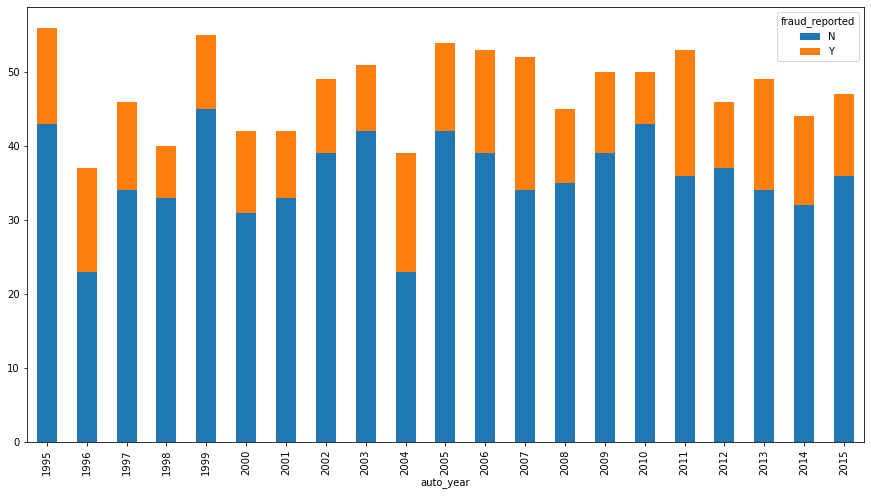

In [64]:
table2=pd.crosstab(df['auto_year'],df['fraud_reported'])
table2.plot(kind='bar',stacked=True)

The highest cases where fraud is reported i.e where fraud is done are for auto maufacturing year 2007.

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

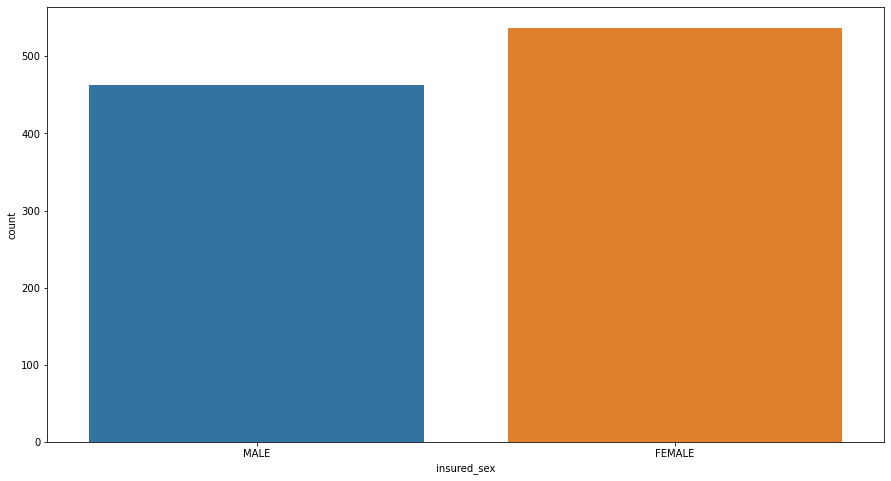

In [65]:
sns.countplot(df['insured_sex'])

In [66]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

There are 537 records of female that is highest as compared to male where insurance is taken.

<AxesSubplot:xlabel='insured_sex'>

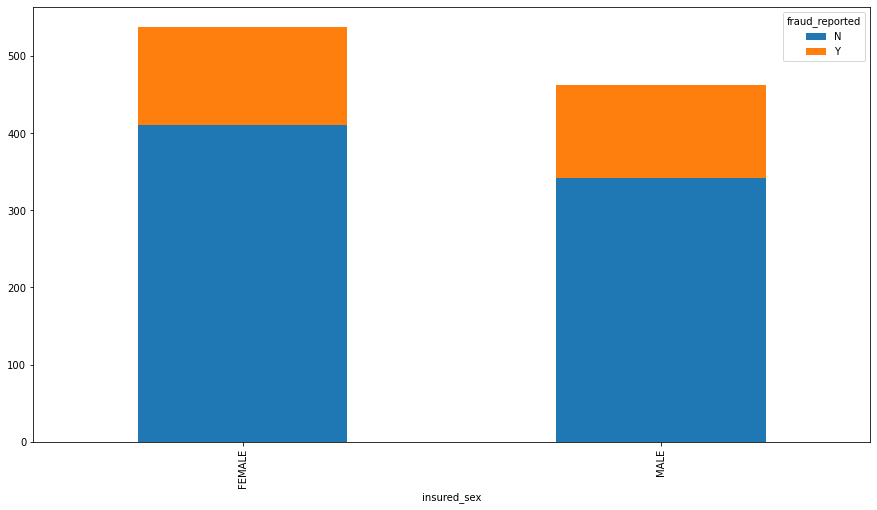

In [68]:
table3=pd.crosstab(df['insured_sex'],df['fraud_reported'])
table3.plot(kind='bar',stacked=True)

In [69]:
df.groupby('insured_sex')['fraud_reported'].value_counts()

insured_sex  fraud_reported
FEMALE       N                 411
             Y                 126
MALE         N                 342
             Y                 121
Name: fraud_reported, dtype: int64

There are 126 cases for female where fraud has been reported i.e where fraud is done highest as compared to male.

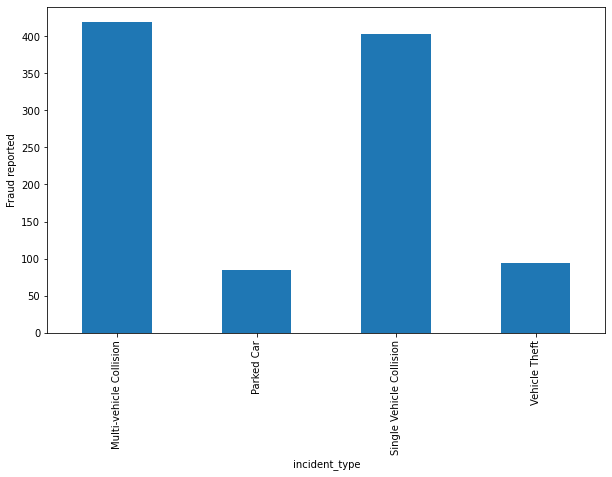

In [70]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type')['fraud_reported'].count().plot.bar()
ax.set_ylabel('Fraud reported')
plt.show()

Most of the fraud reported cases are for multi-vehicle collison followed by Single Vehicle Collision.

In [71]:
pd.crosstab(df['incident_type'],df['fraud_reported'],margins=True)

fraud_reported              N    Y   All
incident_type                           
Multi-vehicle Collision   305  114   419
Parked Car                 76    8    84
Single Vehicle Collision  286  117   403
Vehicle Theft              86    8    94
All                       753  247  1000

The highest cases where fraud is reported i.e fraud has been done are for incident type Single vehicle collision with 117 cases followed by Multi-vehicle Collision.

<AxesSubplot:xlabel='incident_type'>

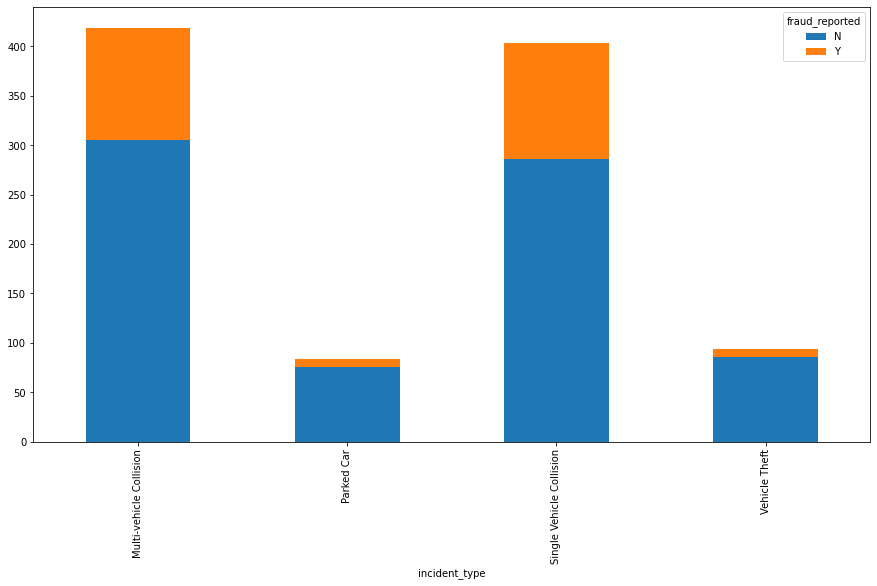

In [72]:
table4=pd.crosstab(df['incident_type'],df['fraud_reported'])
table4.plot(kind='bar',stacked=True)

The lowest case where fraud is reported i.e where fraud has been done are for Parked Car and vehicle theft.

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

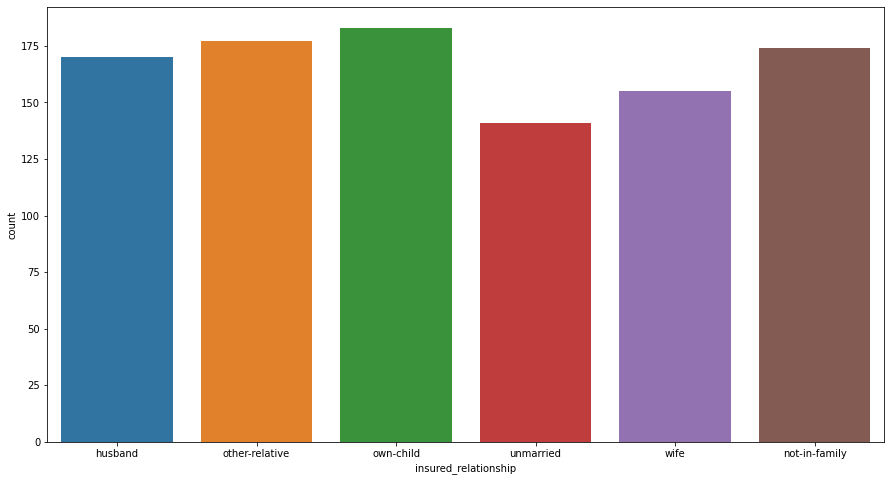

In [73]:
sns.countplot(df['insured_relationship'])

In [74]:
df['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

The own-child type of insured-relationship  is having the highest records.

In [75]:
pd.crosstab(df['insured_relationship'],df['fraud_reported'],margins=True)

fraud_reported          N    Y   All
insured_relationship                
husband               135   35   170
not-in-family         129   45   174
other-relative        125   52   177
own-child             144   39   183
unmarried             107   34   141
wife                  113   42   155
All                   753  247  1000

The highest cases 52 i.e where fraud is done is for other-relative type of insured relationship.

<AxesSubplot:xlabel='insured_relationship'>

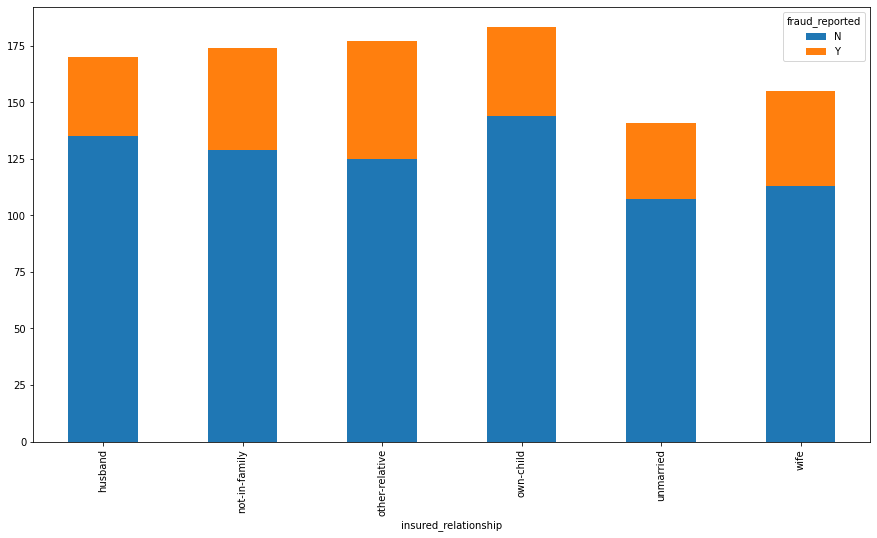

In [76]:
table5=pd.crosstab(df['insured_relationship'],df['fraud_reported'])
table5.plot(kind='bar',stacked=True)

The lowest cases 34 i.e where fraud is done is for unmarried type of insured relationship.

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

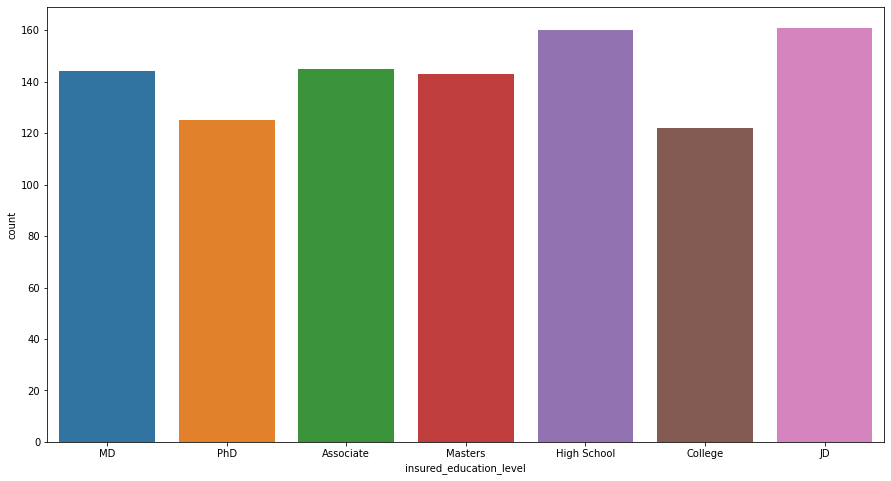

In [77]:
sns.countplot(df['insured_education_level'])

In [80]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

The records for JD  i.e 161 highest as compared to other insured education level.

In [81]:
pd.crosstab(df['insured_education_level'],df['fraud_reported'],margins=True)

fraud_reported             N    Y   All
insured_education_level                
Associate                111   34   145
College                   90   32   122
High School              124   36   160
JD                       119   42   161
MD                       106   38   144
Masters                  111   32   143
PhD                       92   33   125
All                      753  247  1000

The highest cases 42 i.e where fraud is done are having JD as an education level.

<AxesSubplot:xlabel='insured_education_level'>

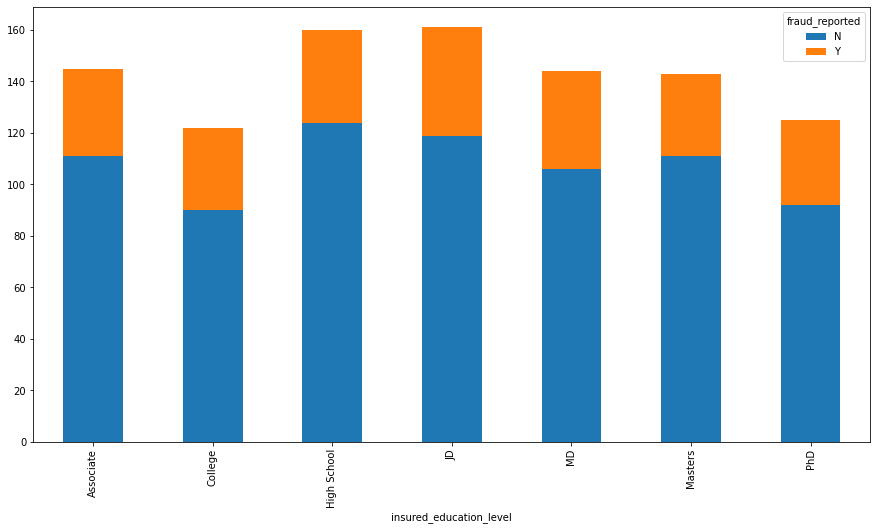

In [82]:
table6=pd.crosstab(df['insured_education_level'],df['fraud_reported'])
table6.plot(kind='bar',stacked=True)

The lowest cases 32 i.e where fraud is done are having College and Masters as an education level.

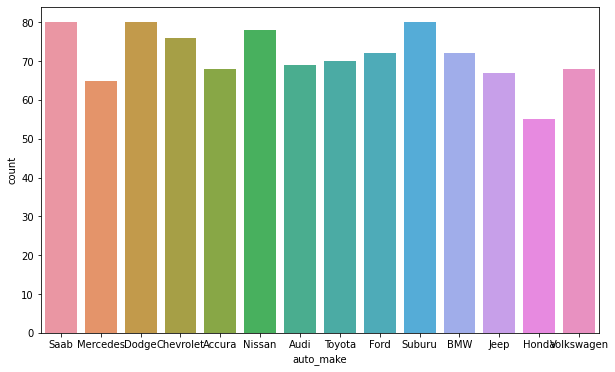

In [83]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=df)
plt.show()

In [86]:
df['auto_make'].value_counts()

Suburu        80
Saab          80
Dodge         80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

The auto maker named  as Suburu ,Saab and Dodge  are having the highest records i.e 80 anf the lowest records are for auto_maker named ads Honda.

<AxesSubplot:xlabel='auto_make'>

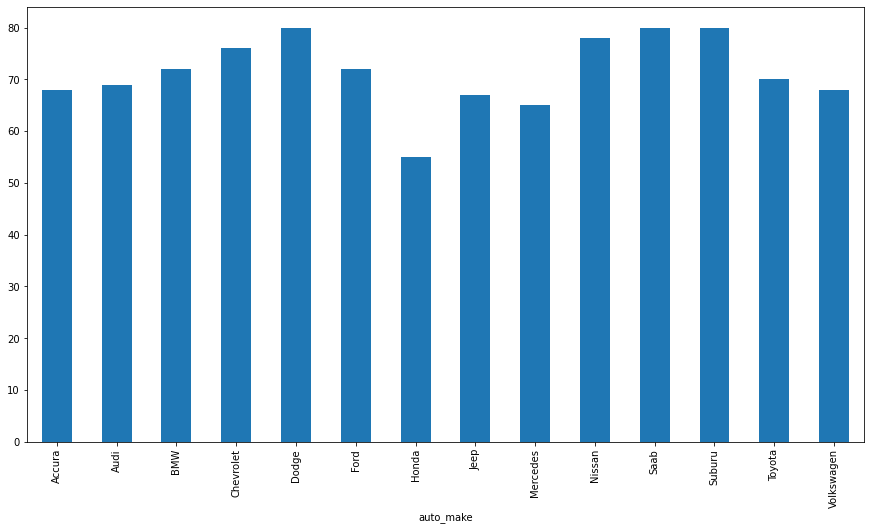

In [87]:
df.groupby('auto_make')['fraud_reported'].count().plot.bar()

In [90]:
pd.crosstab(df['auto_make'],df['fraud_reported'],margins=True)

fraud_reported    N    Y   All
auto_make                     
Accura           55   13    68
Audi             48   21    69
BMW              52   20    72
Chevrolet        55   21    76
Dodge            60   20    80
Ford             50   22    72
Honda            41   14    55
Jeep             56   11    67
Mercedes         43   22    65
Nissan           64   14    78
Saab             62   18    80
Suburu           61   19    80
Toyota           57   13    70
Volkswagen       49   19    68
All             753  247  1000

The highest cases i.e where fraud is done is from auto make ford and mercedes with 22 cases.

<AxesSubplot:xlabel='auto_make'>

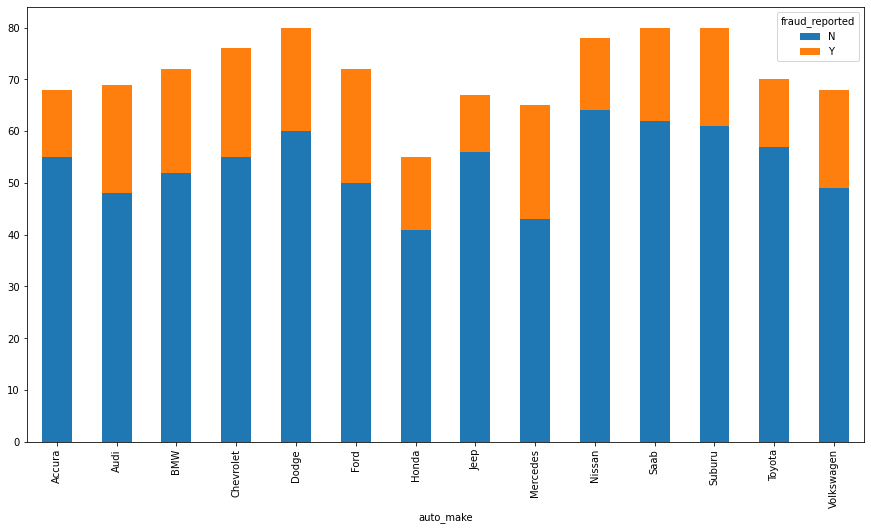

In [91]:
table7=pd.crosstab(df['auto_make'],df['fraud_reported'])
table7.plot(kind='bar',stacked=True)

The lowest  cases i.e where fraud is done is from auto make jeep  and mercedes with 11 cases.

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

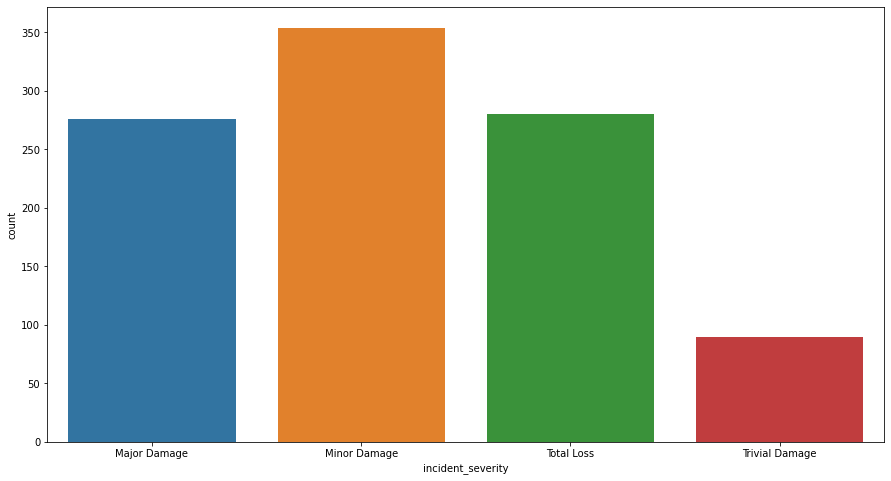

In [93]:
sns.countplot(df['incident_severity'])

In [94]:
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

There are 354 records i.e highest among all for Minor Damage.

<AxesSubplot:xlabel='incident_severity'>

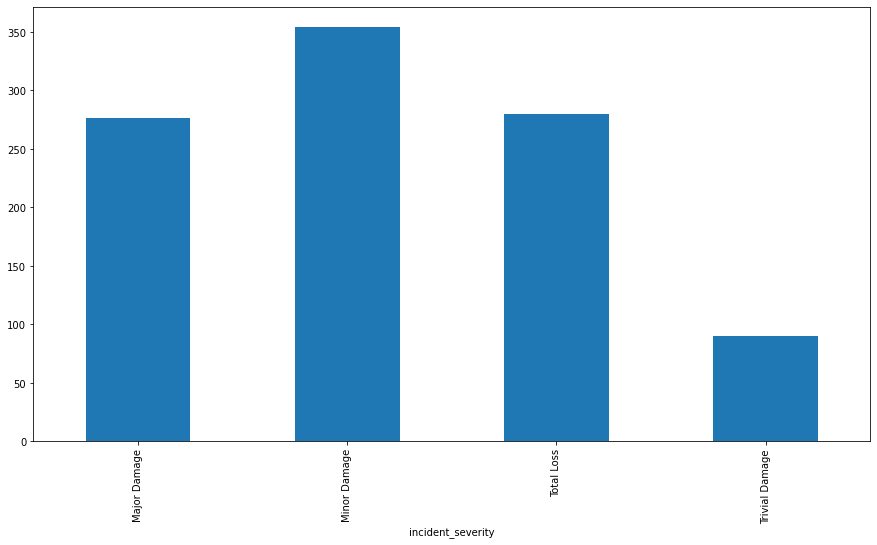

In [96]:
df.groupby('incident_severity')['fraud_reported'].count().plot.bar()

In [99]:
pd.crosstab(df['incident_severity'],df['fraud_reported'])

fraud_reported       N    Y
incident_severity          
Major Damage       109  167
Minor Damage       316   38
Total Loss         244   36
Trivial Damage      84    6

Ther highest cases where fraud is reported i.e where fraud is done is for Major damage type of severity.

<AxesSubplot:xlabel='incident_severity'>

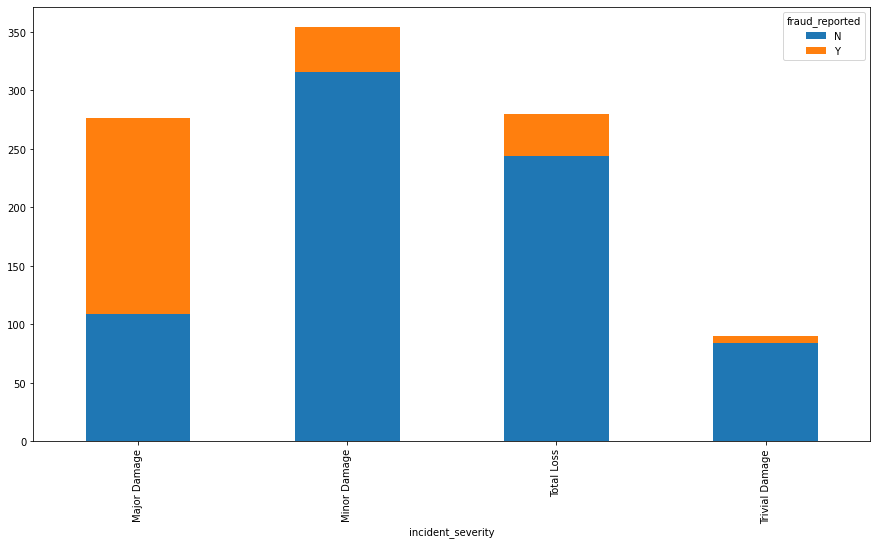

In [101]:
table8=pd.crosstab(df['incident_severity'],df['fraud_reported'])
table8.plot(kind='bar',stacked=True)

Ther lowest cases 6  where fraud is reported i.e where fraud is done is for Trivial damage type of severity.

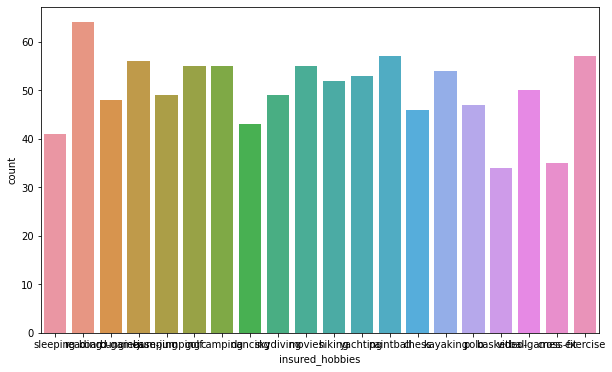

In [103]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)

In [104]:
df['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
camping           55
movies            55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

The highest records 64  are for those insured who are have reading as a hobby.

In [106]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

The highest records 93  are for those insured who are working as a machine-op-inspct .

<AxesSubplot:xlabel='auto_make'>

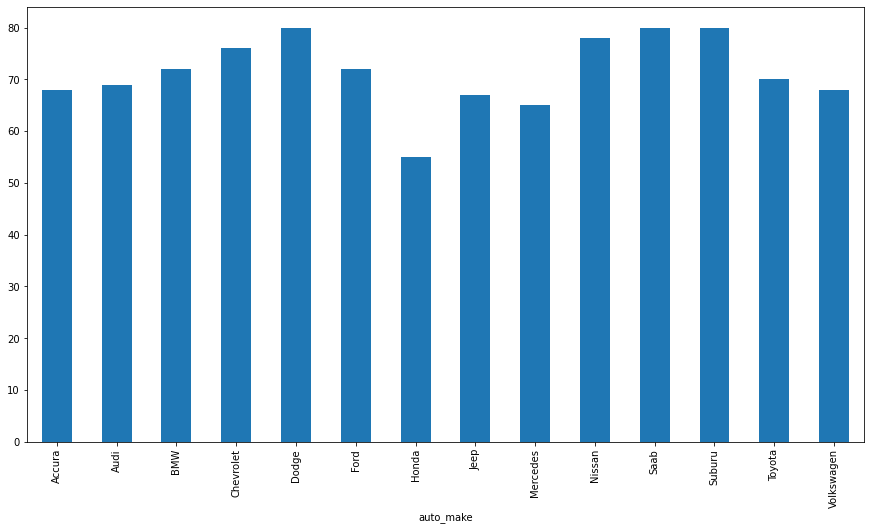

In [107]:
df.groupby('auto_make')['vehicle_claim'].count().plot.bar()

In [109]:
pd.crosstab(df['auto_make'],df['vehicle_claim'],margins=True)

vehicle_claim  70  1440  1680  1750  1760  1800  1960  1980  2030  2080  ...  \
auto_make                                                                ...   
Accura          0     0     0     0     0     0     0     0     0     0  ...   
Audi            1     0     0     0     0     0     0     0     0     0  ...   
BMW             0     0     0     0     0     0     1     0     0     0  ...   
Chevrolet       0     1     0     0     0     1     0     0     0     1  ...   
Dodge           0     0     0     0     0     0     0     0     0     0  ...   
Ford            0     0     1     0     0     0     0     0     0     0  ...   
Honda           0     0     0     0     1     0     0     0     0     0  ...   
Jeep            0     0     0     0     0     0     0     1     0     0  ...   
Mercedes        0     0     0     0     0     0     0     0     0     0  ...   
Nissan          0     0     0     0     0     0     1     0     0     0  ...   
Saab            0     0     0     0     0     0     0     0     0     0  ...   
Suburu          0     0     0     0     0     0     0     0     1     0  ...   
Toyota          0     1     0     1     0     0     0     0     0     0  ...   
Volkswagen      0     0     1     0     0     0     0     0     0     0  ...   
All             1     2     2     1     1     1     2     1     1     1  ...   

vehicle_claim  73620  74790  75530  75600  76000  76400  77670  77760  79560  \
auto_make                                                                      
Accura             0      0      0      0      0      1      1      0      0   
Audi               0      0      0      0      0      0      0      0      1   
BMW                0      0      0      0      0      0      0      0      0   
Chevrolet          0      0      0      1      0      0      0      0      0   
Dodge              1      0      1      0      0      0      0      0      0   
Ford               0      0      0      0      1      0      0      0      0   
Honda              0      0      0      0      0      0      0      0      0   
Jeep               0      0      0      0      0      0      1      0      0   
Mercedes           0      0      0      0      0      0      0      0      0   
Nissan             0      0      0      0      0      0      0      0      0   
Saab               0      1      0      0      0      0      0      0      0   
Suburu             0      0      0      0      0      0      0      1      0   
Toyota             0      0      0      0      0      0      0      0      0   
Volkswagen         0      0      0      0      0      0      0      0      0   
All                1      1      1      1      1      1      2      1      1   

vehicle_claim   All  
auto_make            
Accura           68  
Audi             69  
BMW              72  
Chevrolet        76  
Dodge            80  
Ford             72  
Honda            55  
Jeep             67  
Mercedes         65  
Nissan           78  
Saab             80  
Suburu           80  
Toyota           70  
Volkswagen       68  
All            1000  

[15 rows x 727 columns]

The Audi is having highest vehicle claim amount.

In [111]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

The policy_number, insured_zip are having very large numbers will be dropping those features.

I will also be dropping incident_hour_of_the_day, auto_year.

The month_as_customer, age, policy_deductable,capital-gains,injury_claim,property_loss are having right tailed skewness as mean is greater than median.

The capital-loss,total_claim_amount,vehicle_claim are having left tailed skewness as mean is less than median.

In [112]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

In [113]:
categorical_features  = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

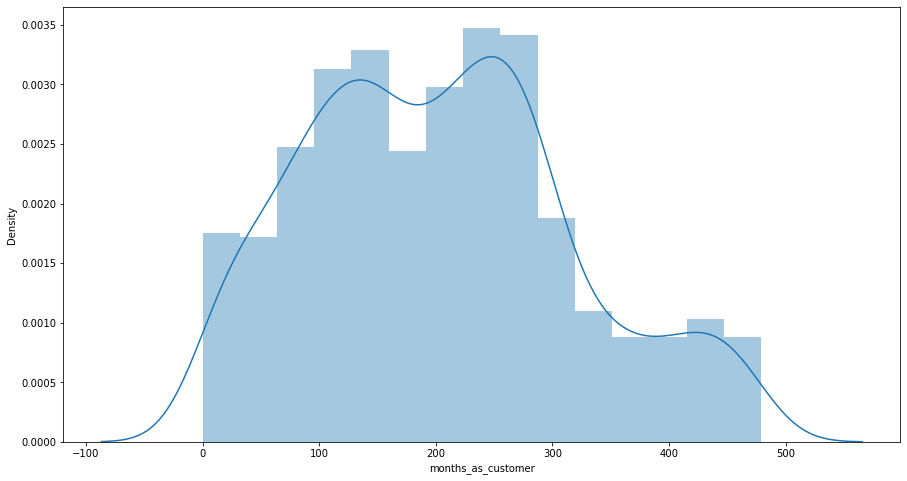

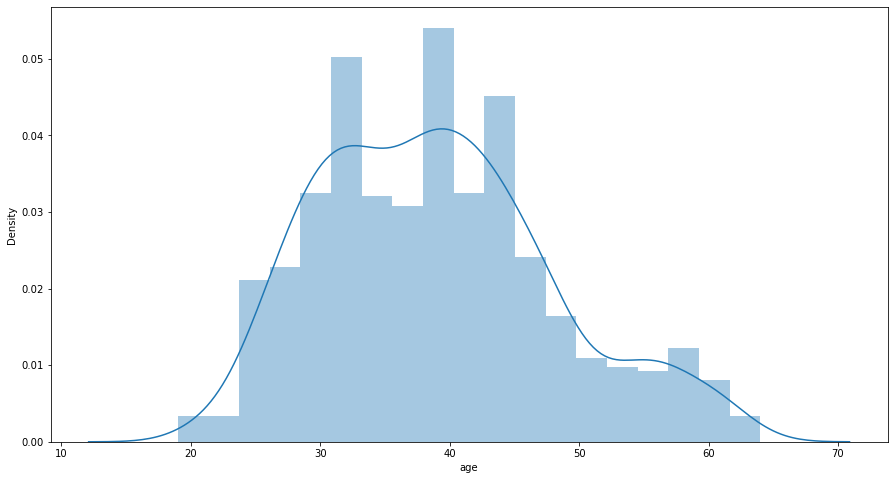

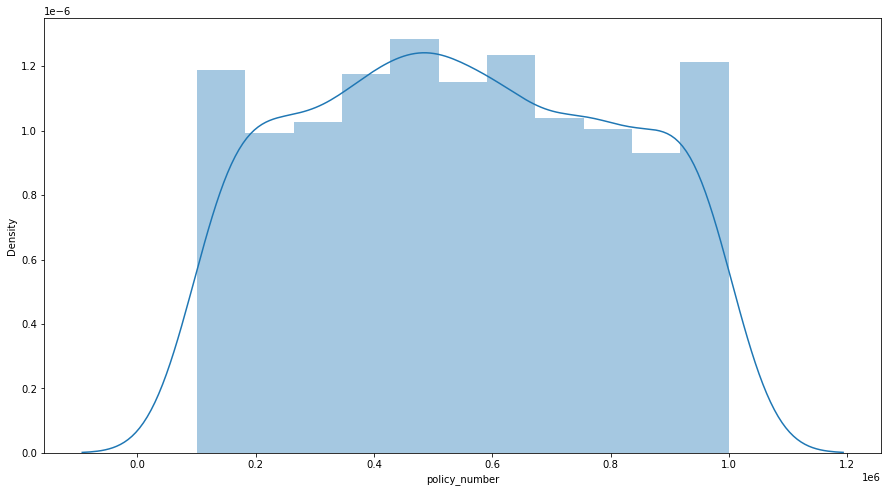

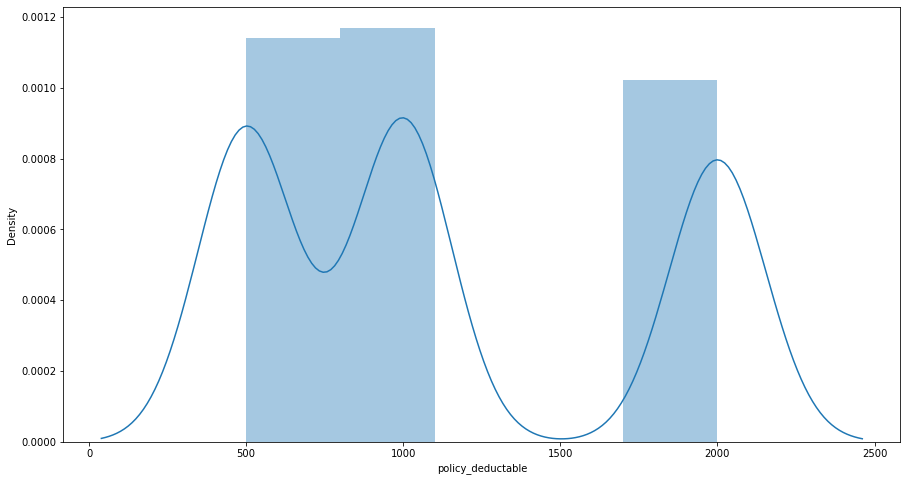

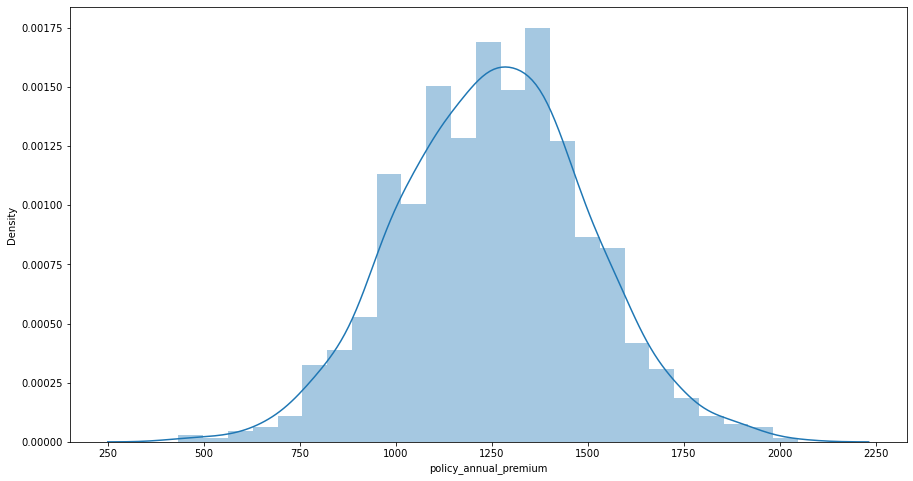

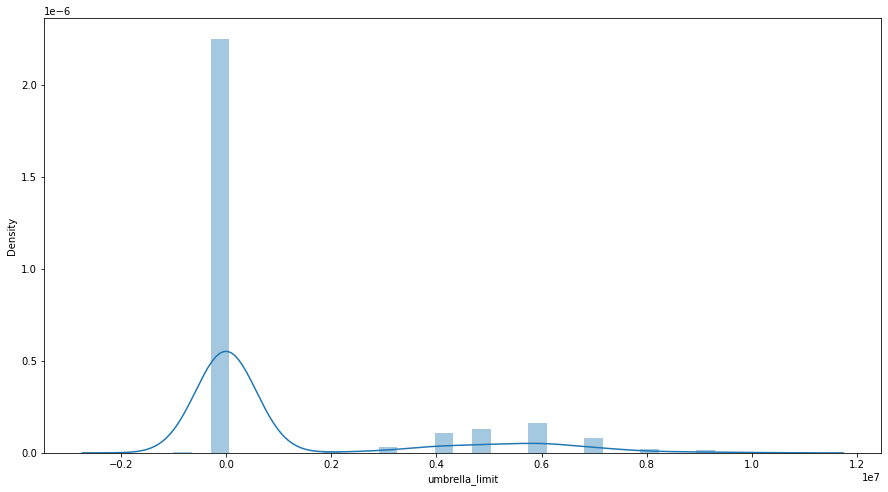

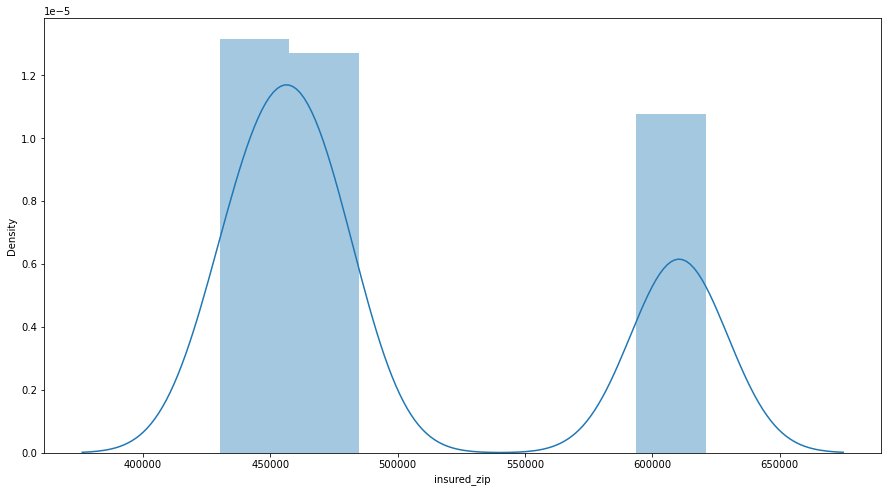

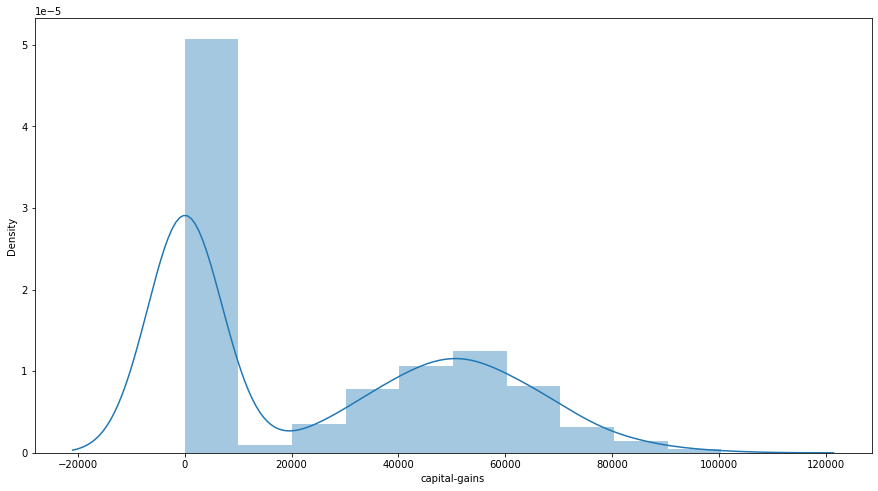

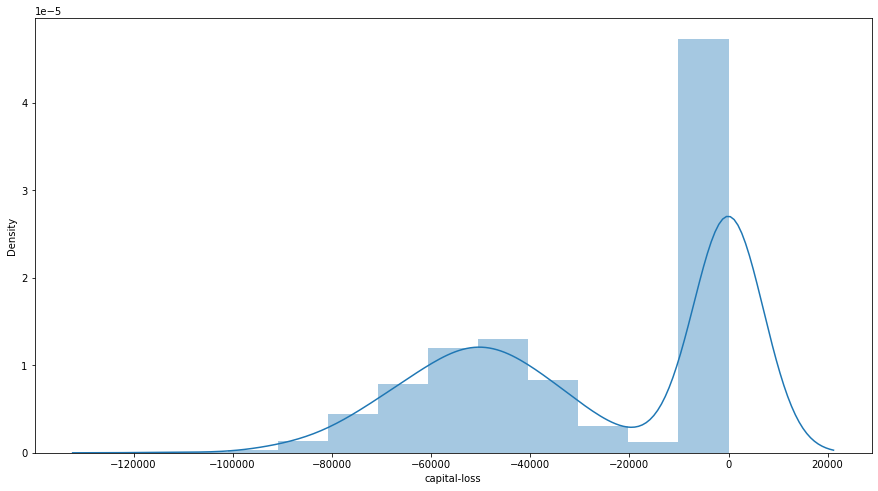

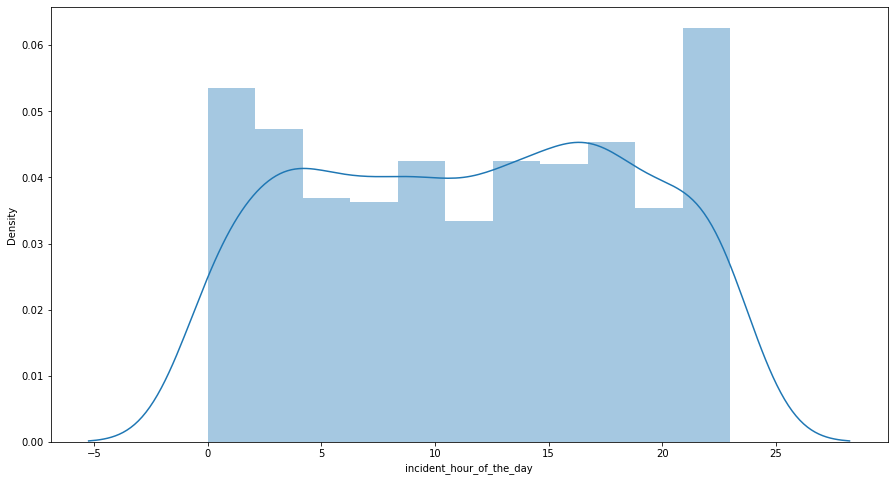

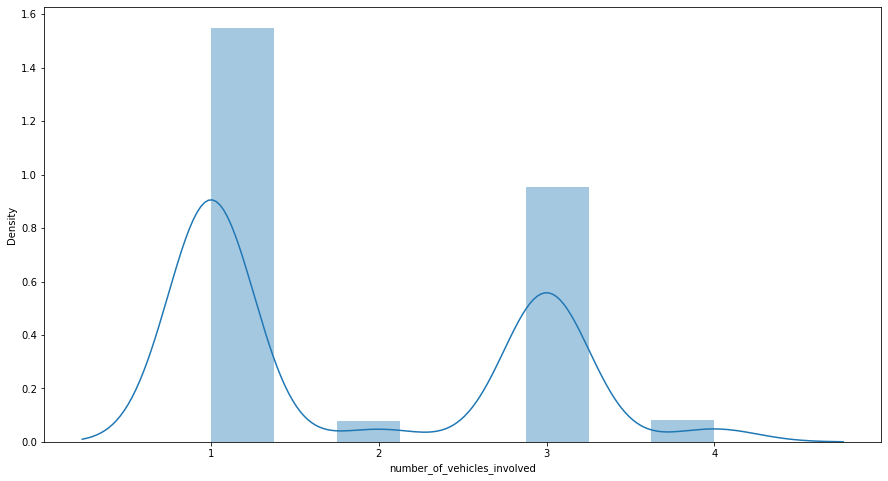

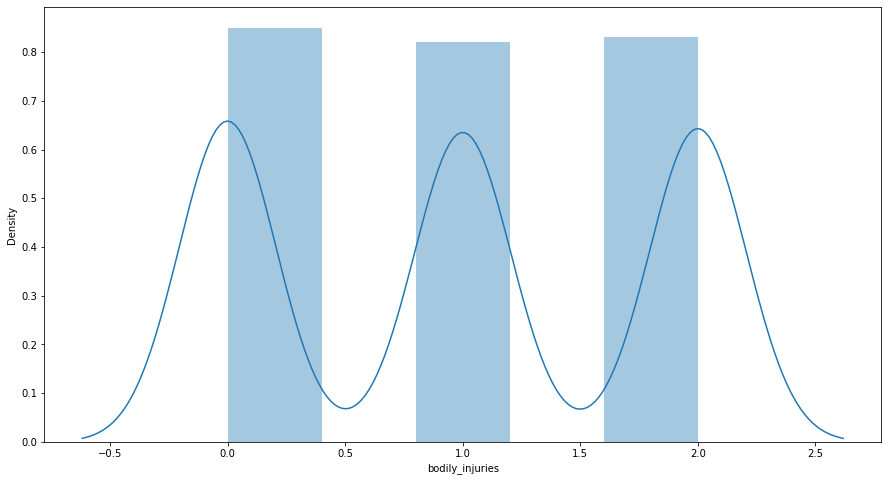

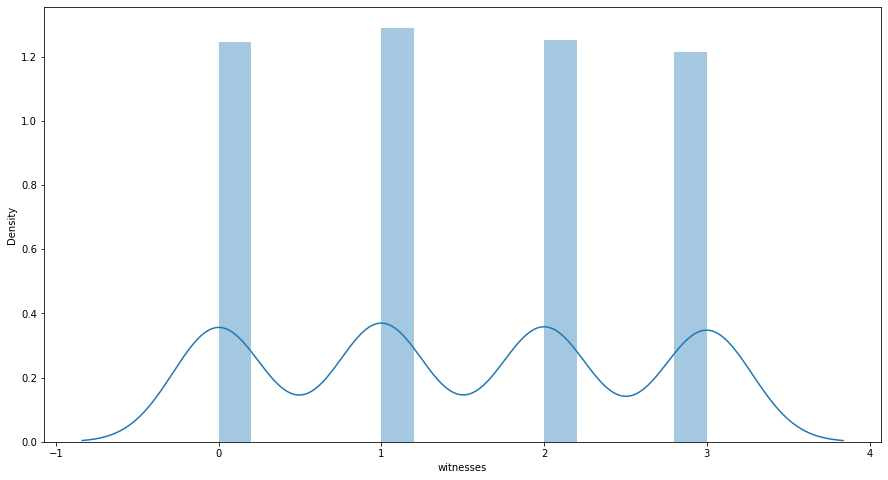

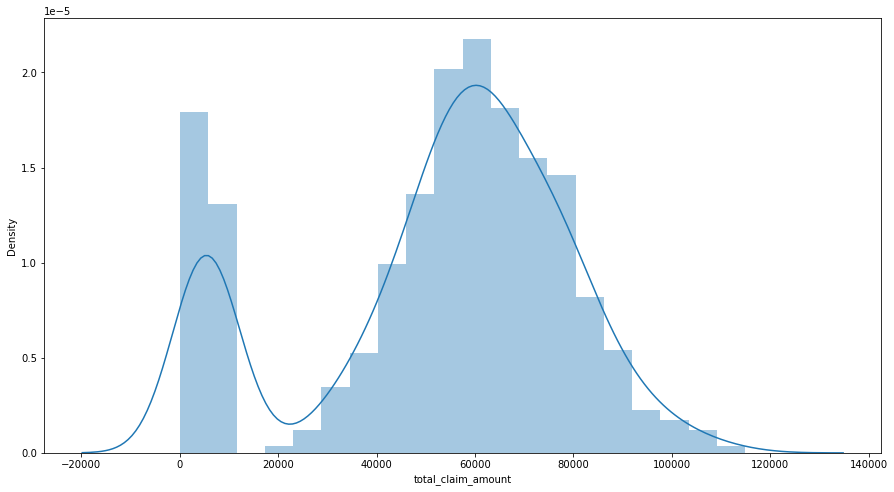

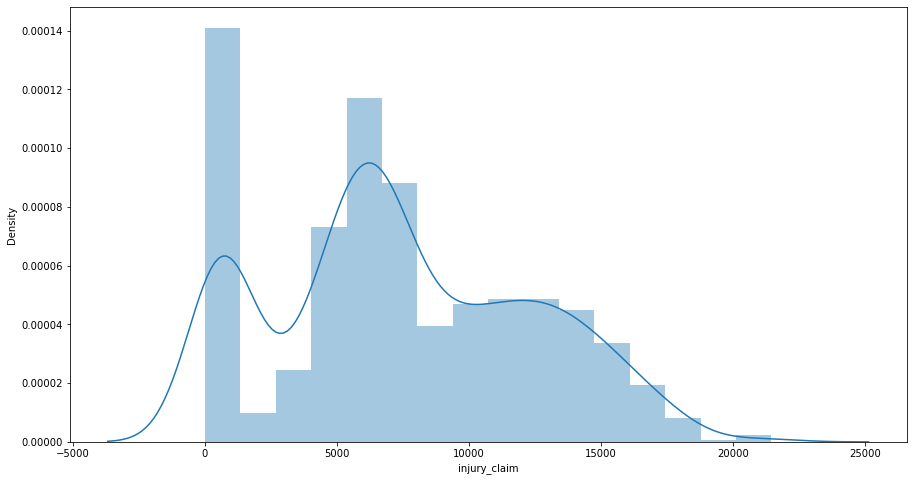

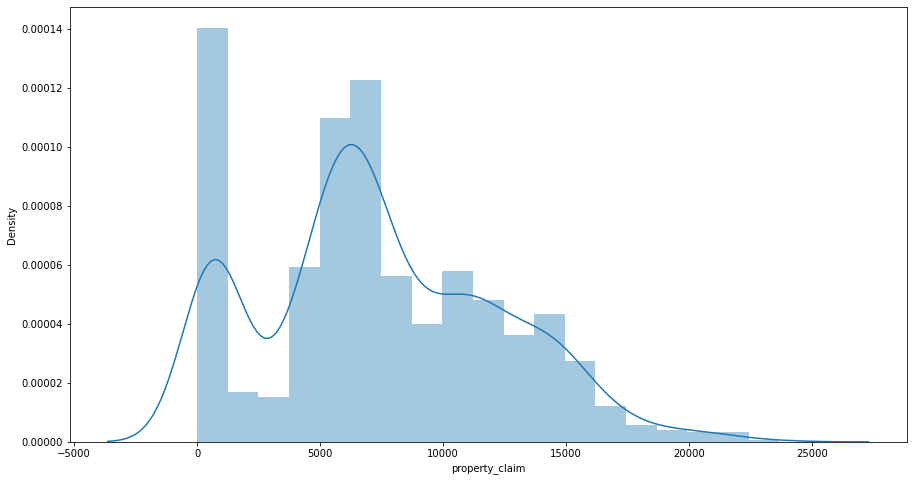

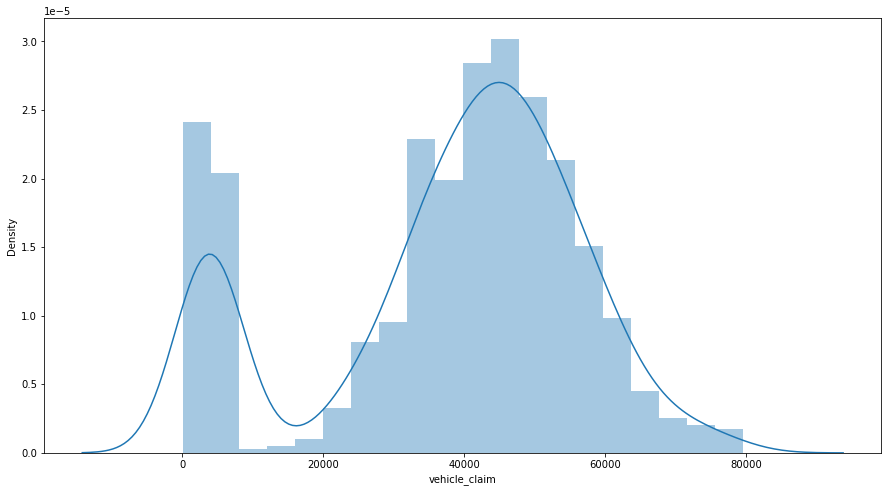

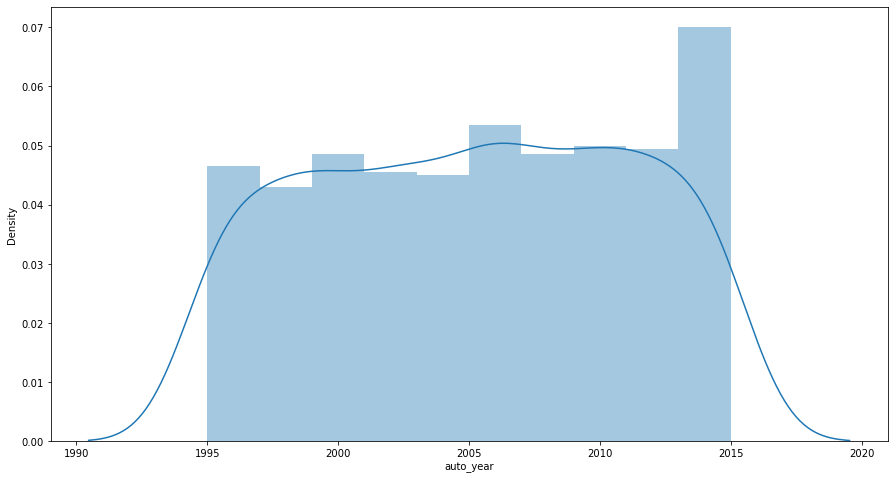

In [116]:
for i in numeric_features.columns:
    sns.distplot(df[i])
    plt.show()

In [117]:
df1=df.copy()

In [155]:
df1

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
5                   256   39         104594       12-10-2006           OH   
6                   137   34         413978       04-06-2000           IN   
7                   165   37         429027       03-02-1990           IL   
8                    27   33         485665       05-02-1997           IL   
9                   212   42         636550       25-07-2011           IL   
10                  235   42         543610       26-05-2002           OH   
11                  447   61         214618       29-05-1999           OH   
12                   60   23         842643       20-11-1997           OH   
13                  121   34         626808       26-10-2012           OH   
14                  180   38         644081       28-12-1998           OH   
15                  473   58         892874       19-10-1992           IN   
16                   70   26         558938       08-06-2005           OH   
17                  140   31         275265       15-11-2004           IN   
18                  160   37         921202       28-12-2014           OH   
19                  196   39         143972       02-08-1992           IN   
20                  460   62         183430       25-06-2002           IN   
21                  217   41         431876       27-11-2005           IL   
22                  370   55         285496       27-05-1994           IL   
23                  413   55         115399       08-02-1991           IN   
24                  237   40         736882       02-02-1996           IN   
25                    8   35         699044       05-12-2013           OH   
26                  257   43         863236       20-09-1990           IN   
27                  202   34         608513       18-07-2002           IN   
28                  224   40         914088       08-02-1990           OH   
29                  241   45         596785       04-03-2014           IL   
30                   64   25         908616       18-02-2000           IL   
31                  166   37         666333       19-06-2008           IL   
32                  155   35         336614       01-08-2003           IL   
33                  114   30         584859       04-04-1992           IL   
34                  149   37         990493       13-01-1991           IL   
35                  147   33         129872       08-08-2010           OH   
36                   62   28         200152       09-03-2003           IL   
37                  289   49         933293       03-02-1993           IL   
38                  431   54         485664       25-11-2002           IN   
39                  199   37         982871       27-07-1997           IN   
40                   79   26         206213       08-05-1995           IL   
41                  116   34         616337       30-08-2012           IN   
42                   37   23         448961       30-04-2006           IL   
43                  106   30         790442       13-04-2003           OH   
44                  269   44         108844       05-12-2007           IL   
45                  265   40         430029       21-08-2006           IL   
46                  163   33         529112       08-01-1990           IN   
47                  355   47         939631       18-03-1990           OH   
48                  175   34         866931       07-01-2008           IN   
49                  192   35         582011       10-03-1997           IL   
50                  430   59         691189       10-01-2004           OH   
5

# identity features with ?

In [118]:
df2=df1.select_dtypes(include=[np.object])
df2.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [156]:
replace={}
for i in list(df1.columns):
    if (df1[i]).dtype=='object':
        find=np.sum(df1[i]=='?')
        replace[i]=find
new=pd.DataFrame.from_dict(replace,orient='index')
print(new)
        
        

                           0
policy_bind_date           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
fraud_reported             0


There are total of 178,360, and 343 values having question mark in collision_type, property_damage and police_report_availalabe features.

In [157]:
df1['collision_type']=df1['collision_type'].replace('?',df1['collision_type'].mode()[0])

In [158]:
df1['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [159]:
df1['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [160]:
df1['property_damage']=df1['property_damage'].replace('?','NO')

In [161]:
df1['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [162]:
df1['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [163]:
df1['police_report_available']=df1['police_report_available'].replace('?','NO')

In [164]:
df1['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

<AxesSubplot:xlabel='collision_type'>

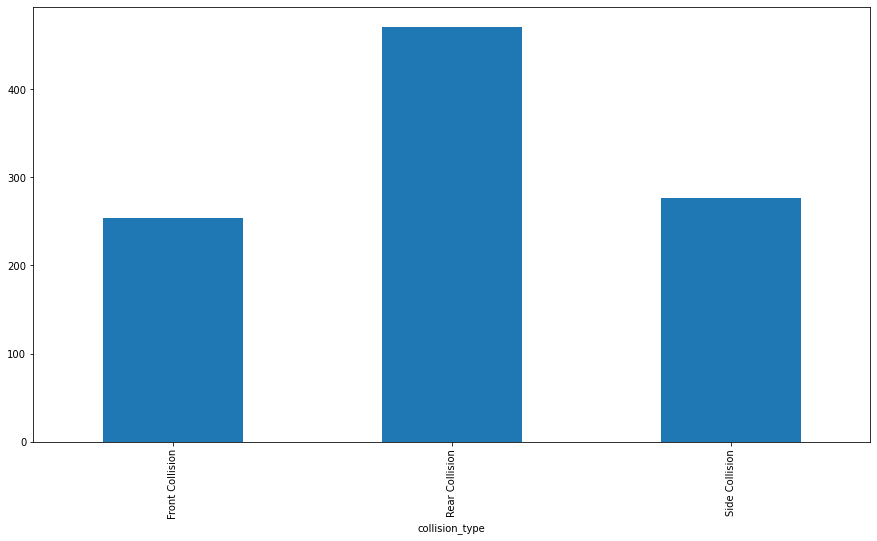

In [165]:
df1.groupby('collision_type')['police_report_available'].count().plot.bar()

In [166]:
pd.crosstab(df1['collision_type'],df1['police_report_available'],margins=True)

police_report_available   NO  YES   All
collision_type                         
Front Collision          181   73   254
Rear Collision           325  145   470
Side Collision           180   96   276
All                      686  314  1000

The rear Collision is having the highest records i.e 470 cases as compared to other collision type.

The maximum police report are available for Rear collision i.e 145 and the lowest police report are available for Front collision.

<AxesSubplot:xlabel='property_damage'>

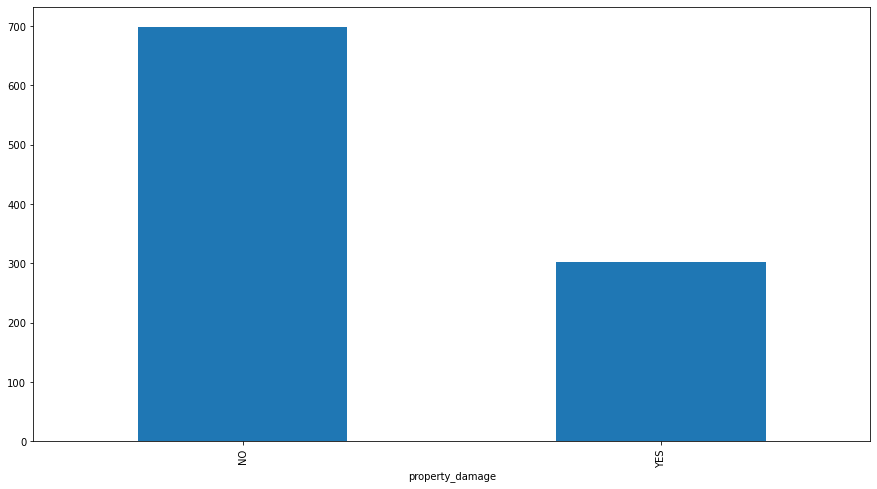

In [167]:
df1.groupby('property_damage')['police_report_available'].count().plot.bar()

In [168]:
pd.crosstab(df1['property_damage'],df1['police_report_available'],margins=True)

police_report_available   NO  YES   All
property_damage                        
NO                       474  224   698
YES                      212   90   302
All                      686  314  1000

The No property damage is having the highest records i.e 698 cases.

In [169]:
df1['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

There are 351 records for 250/500  highest among all other policy_csl.

(array([  4.,  13.,  62., 156., 236., 262., 166.,  72.,  23.,   6.]),
 array([ 433.33 ,  594.756,  756.182,  917.608, 1079.034, 1240.46 ,
        1401.886, 1563.312, 1724.738, 1886.164, 2047.59 ]),
 <BarContainer object of 10 artists>)

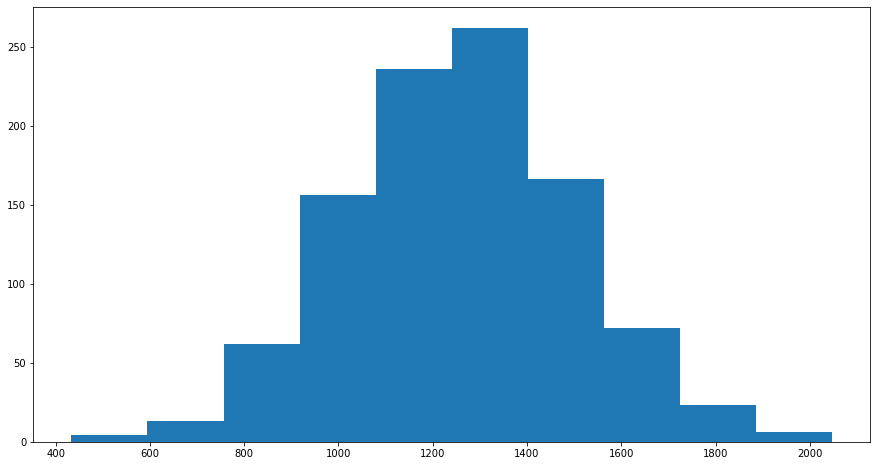

In [170]:
plt.hist(df1['policy_annual_premium'])

The most of the data for policy_annual_premium lies in the range of 1000 to 1400.

In [171]:
df1

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
5                   256   39         104594       12-10-2006           OH   
6                   137   34         413978       04-06-2000           IN   
7                   165   37         429027       03-02-1990           IL   
8                    27   33         485665       05-02-1997           IL   
9                   212   42         636550       25-07-2011           IL   
10                  235   42         543610       26-05-2002           OH   
11                  447   61         214618       29-05-1999           OH   
12                   60   23         842643       20-11-1997           OH   
13                  121   34         626808       26-10-2012           OH   
14                  180   38         644081       28-12-1998           OH   
15                  473   58         892874       19-10-1992           IN   
16                   70   26         558938       08-06-2005           OH   
17                  140   31         275265       15-11-2004           IN   
18                  160   37         921202       28-12-2014           OH   
19                  196   39         143972       02-08-1992           IN   
20                  460   62         183430       25-06-2002           IN   
21                  217   41         431876       27-11-2005           IL   
22                  370   55         285496       27-05-1994           IL   
23                  413   55         115399       08-02-1991           IN   
24                  237   40         736882       02-02-1996           IN   
25                    8   35         699044       05-12-2013           OH   
26                  257   43         863236       20-09-1990           IN   
27                  202   34         608513       18-07-2002           IN   
28                  224   40         914088       08-02-1990           OH   
29                  241   45         596785       04-03-2014           IL   
30                   64   25         908616       18-02-2000           IL   
31                  166   37         666333       19-06-2008           IL   
32                  155   35         336614       01-08-2003           IL   
33                  114   30         584859       04-04-1992           IL   
34                  149   37         990493       13-01-1991           IL   
35                  147   33         129872       08-08-2010           OH   
36                   62   28         200152       09-03-2003           IL   
37                  289   49         933293       03-02-1993           IL   
38                  431   54         485664       25-11-2002           IN   
39                  199   37         982871       27-07-1997           IN   
40                   79   26         206213       08-05-1995           IL   
41                  116   34         616337       30-08-2012           IN   
42                   37   23         448961       30-04-2006           IL   
43                  106   30         790442       13-04-2003           OH   
44                  269   44         108844       05-12-2007           IL   
45                  265   40         430029       21-08-2006           IL   
46                  163   33         529112       08-01-1990           IN   
47                  355   47         939631       18-03-1990           OH   
48                  175   34         866931       07-01-2008           IN   
49                  192   35         582011       10-03-1997           IL   
50                  430   59         691189       10-01-2004           OH   
5

months_as_customer                AxesSubplot(0.125,0.536818;0.065678x0.343182)
age                            AxesSubplot(0.203814,0.536818;0.065678x0.343182)
policy_number                  AxesSubplot(0.282627,0.536818;0.065678x0.343182)
policy_deductable              AxesSubplot(0.361441,0.536818;0.065678x0.343182)
policy_annual_premium          AxesSubplot(0.440254,0.536818;0.065678x0.343182)
umbrella_limit                 AxesSubplot(0.519068,0.536818;0.065678x0.343182)
insured_zip                    AxesSubplot(0.597881,0.536818;0.065678x0.343182)
capital-gains                  AxesSubplot(0.676695,0.536818;0.065678x0.343182)
capital-loss                   AxesSubplot(0.755508,0.536818;0.065678x0.343182)
incident_hour_of_the_day       AxesSubplot(0.834322,0.536818;0.065678x0.343182)
number_of_vehicles_involved          AxesSubplot(0.125,0.125;0.065678x0.343182)
bodily_injuries                   AxesSubplot(0.203814,0.125;0.065678x0.343182)
witnesses                         AxesSu

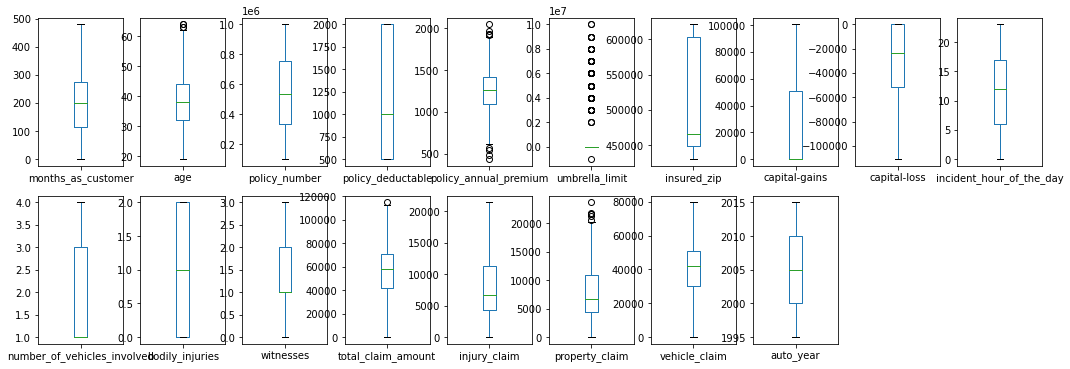

In [177]:
df1.plot(kind='box',figsize=[18,6],layout=(2,10),subplots=True)

There are outliers present in age,policy_annual_premium,property_claim as they are closed to whiskers I am not removing it.

In [178]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

I am not removing outliers from umbrella_limit as the value of umbrella limit can be 6000000.

In [198]:
df3=df1.copy()

In [188]:
df = df.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    '_c39', 
    'auto_year', 
    'incident_hour_of_the_day'])

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
5                   256   39         104594       12-10-2006           OH   
6                   137   34         413978       04-06-2000           IN   
7                   165   37         429027       03-02-1990           IL   
8                    27   33         485665       05-02-1997           IL   
9                   212   42         636550       25-07-2011           IL   
10                  235   42         543610       26-05-2002           OH   
11                  447   61         214618       29-05-1999           OH   
12                   60   23         842643       20-11-1997           OH   
13                  121   34         626808       26-10-2012           OH   
14                  180   38         644081       28-12-1998           OH   
15                  473   58         892874       19-10-1992           IN   
16                   70   26         558938       08-06-2005           OH   
17                  140   31         275265       15-11-2004           IN   
18                  160   37         921202       28-12-2014           OH   
19                  196   39         143972       02-08-1992           IN   
20                  460   62         183430       25-06-2002           IN   
21                  217   41         431876       27-11-2005           IL   
22                  370   55         285496       27-05-1994           IL   
23                  413   55         115399       08-02-1991           IN   
24                  237   40         736882       02-02-1996           IN   
25                    8   35         699044       05-12-2013           OH   
26                  257   43         863236       20-09-1990           IN   
27                  202   34         608513       18-07-2002           IN   
28                  224   40         914088       08-02-1990           OH   
29                  241   45         596785       04-03-2014           IL   
30                   64   25         908616       18-02-2000           IL   
31                  166   37         666333       19-06-2008           IL   
32                  155   35         336614       01-08-2003           IL   
33                  114   30         584859       04-04-1992           IL   
34                  149   37         990493       13-01-1991           IL   
35                  147   33         129872       08-08-2010           OH   
36                   62   28         200152       09-03-2003           IL   
37                  289   49         933293       03-02-1993           IL   
38                  431   54         485664       25-11-2002           IN   
39                  199   37         982871       27-07-1997           IN   
40                   79   26         206213       08-05-1995           IL   
41                  116   34         616337       30-08-2012           IN   
42                   37   23         448961       30-04-2006           IL   
43                  106   30         790442       13-04-2003           OH   
44                  269   44         108844       05-12-2007           IL   
45                  265   40         430029       21-08-2006           IL   
46                  163   33         529112       08-01-1990           IN   
47                  355   47         939631       18-03-1990           OH   
48                  175   34         866931       07-01-2008           IN   
49                  192   35         582011       10-03-1997           IL   
50                  430   59         691189       10-01-2004           OH   
5

In [199]:
df3.drop(['policy_number','insured_zip', 'policy_bind_date','incident_date','incident_location','auto_year','incident_hour_of_the_day'],axis=1,inplace=True)

In [200]:
df3

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
5                   256   39           OH    250/500               1000   
6                   137   34           IN    250/500               1000   
7                   165   37           IL    100/300               1000   
8                    27   33           IL    100/300                500   
9                   212   42           IL    100/300                500   
10                  235   42           OH    100/300                500   
11                  447   61           OH    100/300               2000   
12                   60   23           OH   500/1000                500   
13                  121   34           OH    100/300               1000   
14                  180   38           OH    250/500               2000   
15                  473   58           IN    100/300               2000   
16                   70   26           OH   500/1000               1000   
17                  140   31           IN   500/1000                500   
18                  160   37           OH   500/1000                500   
19                  196   39           IN   500/1000               2000   
20                  460   62           IN    250/500               1000   
21                  217   41           IL   500/1000               2000   
22                  370   55           IL    100/300               2000   
23                  413   55           IN    100/300               2000   
24                  237   40           IN    100/300               1000   
25                    8   35           OH    100/300               2000   
26                  257   43           IN    100/300               2000   
27                  202   34           IN    100/300                500   
28                  224   40           OH    100/300               2000   
29                  241   45           IL   500/1000               2000   
30                   64   25           IL    250/500               1000   
31                  166   37           IL    100/300               2000   
32                  155   35           IL   500/1000               1000   
33                  114   30           IL    100/300               1000   
34                  149   37           IL   500/1000                500   
35                  147   33           OH    100/300               1000   
36                   62   28           IL    100/300               1000   
37                  289   49           IL   500/1000               2000   
38                  431   54           IN   500/1000               2000   
39                  199   37           IN    250/500                500   
40                   79   26           IL    100/300                500   
41                  116   34           IN    250/500                500   
42                   37   23           IL   500/1000                500   
43                  106   30           OH    250/500                500   
44                  269   44           IL    100/300               2000   
45                  265   40           IL    250/500               1000   
46                  163   33           IN    100/300                500   
47                  355   47           OH   500/1000               2000   
48                  175   34           IN   500/1000               1000   
49                  192   35           IL    100/300               1000   
50                  430   59           OH    250/500               2000   
51                   91   27           IL    100/300               2000   
52                  217   39  

In [201]:
df3.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
dtype: float64

I am keeping data as it is not removing skewness from the numeric dataset.

In [202]:
categorical_features1  = df3.select_dtypes(include=[np.object])
categorical_features1.columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [205]:
from sklearn.preprocessing import LabelEncoder
for i in categorical_features1.columns:
    le=LabelEncoder()
    df3[i]=le.fit_transform(df3[i])

In [206]:
df3

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
5                   256   39             2           1               1000   
6                   137   34             1           1               1000   
7                   165   37             0           0               1000   
8                    27   33             0           0                500   
9                   212   42             0           0                500   
10                  235   42             2           0                500   
11                  447   61             2           0               2000   
12                   60   23             2           2                500   
13                  121   34             2           0               1000   
14                  180   38             2           1               2000   
15                  473   58             1           0               2000   
16                   70   26             2           2               1000   
17                  140   31             1           2                500   
18                  160   37             2           2                500   
19                  196   39             1           2               2000   
20                  460   62             1           1               1000   
21                  217   41             0           2               2000   
22                  370   55             0           0               2000   
23                  413   55             1           0               2000   
24                  237   40             1           0               1000   
25                    8   35             2           0               2000   
26                  257   43             1           0               2000   
27                  202   34             1           0                500   
28                  224   40             2           0               2000   
29                  241   45             0           2               2000   
30                   64   25             0           1               1000   
31                  166   37             0           0               2000   
32                  155   35             0           2               1000   
33                  114   30             0           0               1000   
34                  149   37             0           2                500   
35                  147   33             2           0               1000   
36                   62   28             0           0               1000   
37                  289   49             0           2               2000   
38                  431   54             1           2               2000   
39                  199   37             1           1                500   
40                   79   26             0           0                500   
41                  116   34             1           1                500   
42                   37   23             0           2                500   
43                  106   30             2           1                500   
44                  269   44             0           0               2000   
45                  265   40             0           1               1000   
46                  163   33             1           0                500   
47                  355   47             2           2               2000   
48                  175   34             1           2               1000   
49                  192   35             0           0               1000   
50                  430   59             2           1               2000   
5

In [207]:
corr=df3.corr()
corr['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
property_damage                0.017202
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
insured_occupation             0.001564
auto_model                     0.000720
policy_annual_premium         -0.014480
capital-loss                  -0.014863
collision_type                -0.017315
capital-gains                 -0.019173
auto_make                     -0.027519
police_report_available       -0.027768


In [210]:
x=df3.drop('fraud_reported',axis=1)
y=df3['fraud_reported']

In [211]:
se=StandardScaler()
x=se.fit_transform(x)

In [212]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=42)

In [214]:
from sklearn.linear_model import LogisticRegression

In [216]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.715
              precision    recall  f1-score   support

           0       0.77      0.87      0.81       287
           1       0.49      0.33      0.39       113

    accuracy                           0.71       400
   macro avg       0.63      0.60      0.60       400
weighted avg       0.69      0.71      0.70       400

[[249  38]
 [ 76  37]]


In [217]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred1=dtc.predict(x_test)
print(accuracy_score(y_test,pred1))
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test,pred1))

0.785
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       287
           1       0.62      0.63      0.62       113

    accuracy                           0.79       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.79      0.79      0.79       400

[[243  44]
 [ 42  71]]


In [218]:
svc=SVC()
svc.fit(x_train,y_train)
pred2=svc.predict(x_test)
print(accuracy_score(y_test,pred2))
print(classification_report(y_test,pred2))
print(confusion_matrix(y_test,pred2))

0.7175
              precision    recall  f1-score   support

           0       0.72      0.98      0.83       287
           1       0.50      0.05      0.10       113

    accuracy                           0.72       400
   macro avg       0.61      0.52      0.46       400
weighted avg       0.66      0.72      0.62       400

[[281   6]
 [107   6]]


In [219]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred3=knn.predict(x_test)
print(accuracy_score(y_test,pred3))
print(classification_report(y_test,pred3))
print(confusion_matrix(y_test,pred3))

0.705
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       287
           1       0.43      0.14      0.21       113

    accuracy                           0.70       400
   macro avg       0.58      0.53      0.52       400
weighted avg       0.65      0.70      0.65       400

[[266  21]
 [ 97  16]]


In [221]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred4=rfc.predict(x_test)
print(accuracy_score(y_test,pred4))
print(classification_report(y_test,pred4))
print(confusion_matrix(y_test,pred4))

0.7175
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       287
           1       0.50      0.24      0.32       113

    accuracy                           0.72       400
   macro avg       0.63      0.57      0.57       400
weighted avg       0.68      0.72      0.68       400

[[260  27]
 [ 86  27]]


In [222]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred5=ada.predict(x_test)
print(accuracy_score(y_test,pred5))
print(classification_report(y_test,pred5))
print(confusion_matrix(y_test,pred5))

0.77
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       287
           1       0.62      0.50      0.55       113

    accuracy                           0.77       400
   macro avg       0.72      0.69      0.70       400
weighted avg       0.76      0.77      0.76       400

[[252  35]
 [ 57  56]]


In [223]:
gr=GradientBoostingClassifier()
gr.fit(x_train,y_train)
pred6=ada.predict(x_test)
print(accuracy_score(y_test,pred6))
print(classification_report(y_test,pred6))
print(confusion_matrix(y_test,pred6))

0.77
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       287
           1       0.62      0.50      0.55       113

    accuracy                           0.77       400
   macro avg       0.72      0.69      0.70       400
weighted avg       0.76      0.77      0.76       400

[[252  35]
 [ 57  56]]


# Checking out cross_val_score

In [224]:
from sklearn.model_selection import cross_val_score

In [225]:
score=cross_val_score(lr,x,y,cv=5)
print(score.mean())

0.775


In [226]:
score1=cross_val_score(dtc,x,y,cv=5)
print(score1.mean())

0.795


In [227]:
score2=cross_val_score(knn,x,y,cv=5)
print(score2.mean())

0.7269999999999999


In [228]:
score3=cross_val_score(svc,x,y,cv=5)
print(score3.mean())

0.752


In [229]:
score4=cross_val_score(rfc,x,y,cv=5)
print(score4.mean())

0.7769999999999999


In [230]:
score5=cross_val_score(ada,x,y,cv=5)
print(score5.mean())

0.8


In [231]:
score6=cross_val_score(gr,x,y,cv=5)
print(score6.mean())

0.8089999999999999


Will do hypertuning of parameters as the cross_val_score and the accuracy_score is minimum for decision tree classifier.

In [232]:
from sklearn.model_selection import RandomizedSearchCV

In [233]:
param1={'criterion':['gini','entropy'],'max_depth':np.arange(1,10),'max_features':['auto','sqrt','log2'],'random_state':np.arange(1,100)}

In [234]:
re=RandomizedSearchCV(dtc,param_distributions=param1,n_jobs=-1,cv=5)
re.fit(x_train,y_train)
re.best_params_

{'random_state': 25,
 'max_features': 'auto',
 'max_depth': 2,
 'criterion': 'gini'}

In [235]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=2,max_features='auto',random_state=25)
dtc.fit(x_train,y_train)
pred7=dtc.predict(x_test)
print(accuracy_score(y_test,pred7))
print(classification_report(y_test,pred7))
print(confusion_matrix(y_test,pred7))

0.76
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       287
           1       0.62      0.38      0.47       113

    accuracy                           0.76       400
   macro avg       0.71      0.64      0.66       400
weighted avg       0.74      0.76      0.74       400

[[261  26]
 [ 70  43]]


# Decision Tree is my best model with 76% accuracy score.

In [236]:
from sklearn.metrics import plot_roc_curve

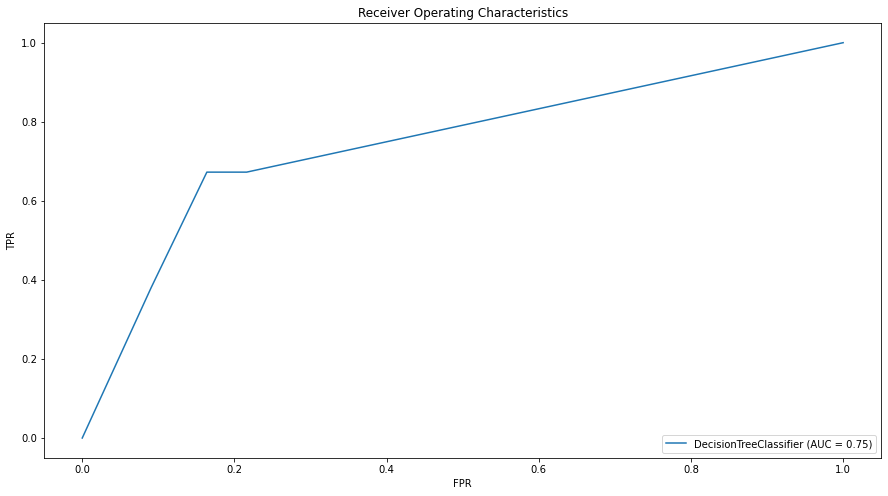

In [237]:
plot_roc_curve(dtc,x_test,y_test)
plt.title('Receiver Operating Characteristics')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# I am getting AUC score of 75% with Decision Tree Classifier.

In [238]:
import joblib

In [239]:
joblib.dump(dtc,'fraud_detection.obj')

['fraud_detection.obj']

In [240]:
joblib.load('fraud_detection.obj')

DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=25)